In [1]:
import pandas as pd
import seaborn as sns

In [2]:
def encode_str_label(_dataframe, _columnname):
    from sklearn.preprocessing import LabelEncoder
    _class_lb = LabelEncoder()
    _dataframe['%s' % _columnname] = _class_lb.fit_transform(_dataframe['%s' % _columnname].values)


def encode_str_labels(_dataframe, _labelList):
    from sklearn.preprocessing import LabelEncoder
    for _columnname in _labelList:
        _class_lb = LabelEncoder()
        _dataframe['%s' % _columnname] = _class_lb.fit_transform(_dataframe['%s' % _columnname].values)

In [3]:
train_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")

N_train = train_set.shape[0]
N_test = test_set.shape[0]

In [4]:
all_set = pd.concat((train_set.iloc[:, 1:], test_set.iloc[:, 1:]))
str_set = all_set.dtypes[all_set.dtypes == 'object'].index
numeric_set = all_set.dtypes[all_set.dtypes != 'object'].index
all_set[numeric_set].apply(
    lambda x: ((x - x.mean()) / x.std())
)
encode_str_labels(all_set, str_set)
all_set = all_set.fillna(0)

In [5]:
train_set = all_set.iloc[:N_train]
test_set = all_set.iloc[N_train:,:-1]

In [6]:
# initial judge between different models
# train_set = train_set.sample(n=30000)
X_train = train_set.iloc[:, :-1]
y_train = train_set.iloc[:, -1]

In [7]:
# # sample selection
# X_train = X_train[["cat1", "cont11", "cont0", "cont5", "cont13"]]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, train_size=0.8, random_state=1024)

In [9]:
# # Grid Search CV
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingRegressor

# param_test1 = [{
#     "learning_rate": [0.05, 0.1, 0.2]
# #     "max_depth": range(10, 101, 10)
# }]

# # max_features, "max_depth": range(10, 101, 10), min_samples_split, min_samples_leaf

# gsearch1 = GridSearchCV(
#     estimator=GradientBoostingRegressor(), param_grid=param_test1, 
#     scoring='neg_root_mean_squared_error', 
#     cv=5, n_jobs=8, verbose=2
# )
# gsearch1.fit(X_train, y_train)

# gsearch1.best_params_, gsearch1.best_score_

In [10]:
# from sklearn.ensemble import GradientBoostingRegressor
# model = GradientBoostingRegressor(learning_rate=0.2)
# model.fit(X_train, y_train)

In [11]:
# predict_val = model.predict(X_train)

# # Model Performance on train
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from math import sqrt
# print("MSE%:", mean_squared_error(y_train, predict_val) * 100)
# print("MAE%:", mean_absolute_error(y_train, predict_val) * 100)
# print("R2%:", r2_score(y_train, predict_val) * 100)
# print("RMSE%:", sqrt(mean_squared_error(y_train, predict_val)) * 100)

In [12]:
# predict_val = model.predict(X_validation)

# # Model Performance on validation
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from math import sqrt
# print("MSE%:", mean_squared_error(y_validation, predict_val) * 100)
# print("MAE%:", mean_absolute_error(y_validation, predict_val) * 100)
# print("R2%:", r2_score(y_validation, predict_val) * 100)
# print("RMSE%:", sqrt(mean_squared_error(y_validation, predict_val)) * 100)

In [13]:
# # Permutation Importance
# import eli5
# from eli5.sklearn import PermutationImportance

# perm = PermutationImportance(model, random_state=1).fit(X_train, y_train)
# eli5.show_weights(perm, feature_names = X_train.columns.tolist())

In [17]:
# <1> for-loop selection: learning_rate. 0.1 ~ 1 / 0.1
# score_list: [_lr, RMSE_train, RMSE_validation]
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

score_list = []
for _l in range(1, 11, 1):
    _lr = _l / 10
    model = GradientBoostingRegressor(learning_rate=_lr)
    model.fit(X_train, y_train)
    
    predict_train = model.predict(X_train)
    predict_val = model.predict(X_validation)

    score_list.append([_lr, 
                       sqrt(mean_squared_error(y_train, predict_train)) * 100, 
                       "Train"
                      ])
    
    score_list.append([_lr, 
                        sqrt(mean_squared_error(y_validation, predict_val)) * 100,
                       "Validation"
                      ])
    print(_lr, "completed.")
    
    
score_list = pd.DataFrame(score_list, columns=["lr", "RMSE", "RMSE_type"])

sns.set_theme(style="darkgrid")
sns.lineplot(x="lr", y="RMSE", hue="RMSE_type", data=score_list)

0.1 completed.
0.2 completed.
0.3 completed.
0.4 completed.
0.5 completed.
0.6 completed.
0.7 completed.
0.8 completed.
0.9 completed.
1.0 completed.


<AxesSubplot:xlabel='lr', ylabel='RMSE'>

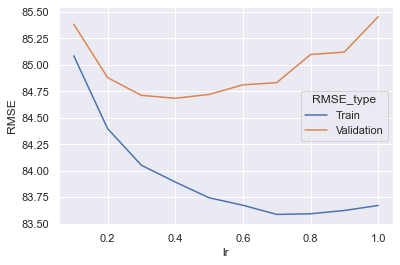

In [20]:
# <2> for-loop selection: n_estimator. 20 ~ 100 / 10
# score_list: [_lr, RMSE_train, RMSE_validation]
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

score_list = []
for _n in range(20, 101, 10):
    model = GradientBoostingRegressor(learning_rate=0.3, n_estimators = _n)
    model.fit(X_train, y_train)
    
    predict_train = model.predict(X_train)
    predict_val = model.predict(X_validation)

    score_list.append([_n, 
                       sqrt(mean_squared_error(y_train, predict_train)) * 100, 
                       "Train"
                      ])
    
    score_list.append([_n, 
                        sqrt(mean_squared_error(y_validation, predict_val)) * 100,
                       "Validation"
                      ])
    print(_n, "completed.")
    
    


20 completed.
30 completed.
40 completed.
50 completed.
60 completed.
70 completed.
80 completed.
90 completed.
100 completed.


ValueError: Could not interpret value `lr` for parameter `x`

<AxesSubplot:xlabel='n_estimator', ylabel='RMSE'>

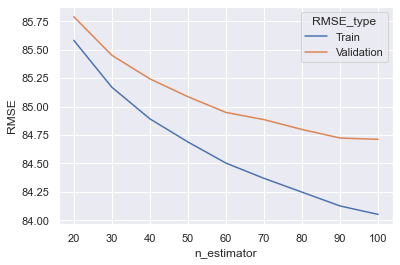

In [22]:
score_list = pd.DataFrame(score_list, columns=["n_estimator", "RMSE", "RMSE_type"])

sns.set_theme(style="darkgrid")
sns.lineplot(x="n_estimator", y="RMSE", hue="RMSE_type", data=score_list)

In [ ]:
# <3> for-loop selection: max_depth. 5 ~ 12 / 2

# <4> for-loop selection: num_samples_split. 200 ~ 1000 / 200
#     if num_samples_split is the sup, max_depth-- then refind num_samples_split and compare.

# <5> for-loop selection: min_samples_leaf. 30 ~ 70 / 10
#     can do again with num_samples_split with bigger space: 1000 ~ 2100 / 200
#     then check the permutation importance to see whether upper features are clustered.

# <6> for-loop selection: max_features. 7 ~ 19 / 2

In [ ]:
predict_val = model.predict(test_set)

In [17]:
test_set = pd.read_csv("test.csv")
test_set["target"] = predict_val

In [18]:
submission = pd.concat([test_set['id'], test_set['target']], axis=1)
submission.to_csv("submission.csv", index=False)

In [ ]:
# import pandas as pd
# import time
# import multiprocessing
# import seaborn
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from math import sqrt

# num_process = 8

# def encode_str_label(_dataframe, _columnname):
#     from sklearn.preprocessing import LabelEncoder
#     _class_lb = LabelEncoder()
#     _dataframe['%s' % _columnname] = _class_lb.fit_transform(_dataframe['%s' % _columnname].values)
# def encode_str_labels(_dataframe, _labelList):
#     from sklearn.preprocessing import LabelEncoder
#     for _columnname in _labelList:
#         _class_lb = LabelEncoder()
#         _dataframe['%s' % _columnname] = _class_lb.fit_transform(_dataframe['%s' % _columnname].values)


# # def database_set(_train_data, _test_data):
# #
# #
# #     return X_train, y_train


# def _iterate_search(x):
#     model = GradientBoostingRegressor(

#     )
#     model.fit(X_train, y_train)

# if __name__ == "__main__":
#     _start_time = time.time()

#     train_set = pd.read_csv("train.csv")
#     test_set = pd.read_csv("test.csv")

#     N_train = train_set.shape[0]
#     N_test = test_set.shape[0]

#     all_set = pd.concat((train_set.iloc[:, 1:], test_set.iloc[:, 1:]))
#     str_set = all_set.dtypes[all_set.dtypes == 'object'].index
#     numeric_set = all_set.dtypes[all_set.dtypes != 'object'].index
#     all_set[numeric_set].apply(
#         lambda x: ((x - x.mean()) / x.std())
#     )
#     encode_str_labels(all_set, str_set)
#     all_set = all_set.fillna(0)
#     train_set = all_set.iloc[:N_train]
#     test_set = all_set.iloc[N_train:, :-1]

#     print("Dataset cleared. Time at:", time.time() - _start_time)

#     # initial judge between different models
#     train_set = train_set.sample(n=30000)
#     X_train = train_set.iloc[:, :-1]
#     y_train = train_set.iloc[:, -1]

#     # multiprocess to select hyperparameters.
#     ts = []
#     for j in range(1, num_process + 1):
#         t = multiprocessing.Process(target=_iterate_search, args=(j,))
#         t.start()
#         ts.append(t)

#     for t in ts:
#         t.join()

#     # draw the trend of RMSE on X_train and X_validation